# Exploratory data analysis through plotting

In [11]:
#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The read depth distribution of variant genotypes (histogram)

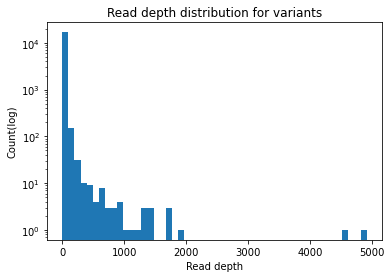

In [60]:
f = open('predict.vcf', 'r')

read_depth = [] #list 

for line in f:
    if '#' in line: #remove header
        continue
    fields = line.split('\t') #separate by tab
    form = fields[-1].split(':') #select only FORMAT, spearate by :
    if form[2] != '.':
        read_depth.append(int(form[2])) #add information to list

f.close()

#plot list

fig, ax = plt.subplots()    
ax.hist(depth, bins=50, log=True) 
ax.set_title('Read depth distribution for variants')
ax.set_xlabel('Read depth')
ax.set_ylabel('Count (log)',)
plt.show()

### The quality distribution of variant genotypes (histogram)

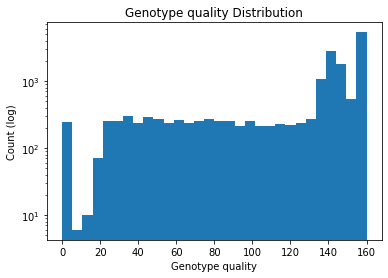

In [61]:
f = open('predict.vcf', 'r')

quality = []

for line in f:
    if '#' in line:   #remove header
        continue
    fields = line.split('\t') #separate by tab
    form = fields[-1].split(':') #select only FORMAT, spearate by :
    if form[1] != '.':
        quality.append(float(form[1])) #add information to list

f.close()

#plot list
fig, ax = plt.subplots()
ax.hist(quality, bins=30, log=True)
ax.set_title('Genotype quality Distribution')
ax.set_xlabel('Genotype quality')
ax.set_ylabel('Count (log)',)
plt.show()

### The allele frequency spectrum of your identified variants (histogram)

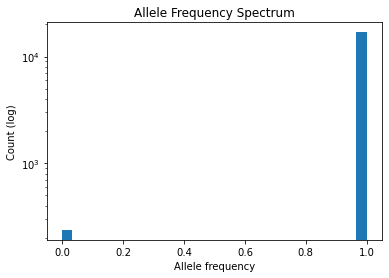

In [62]:
f = open('predict.vcf', 'r')

allele_freq = []

for line in f:
    if '#' in line: #remove header
        continue
    fields = line.split(';')  #separate by tab
    if fields[3] != '.':
        allele_freq.append(int(fields[3].strip('AF=')))    

f.close()

fig, ax = plt.subplots()
ax.hist(allele_freq, bins=30, log=True)
ax.set_title('Allele Frequency Spectrum')
ax.set_xlabel('Allele frequency')
ax.set_ylabel('Count (log)',)
plt.show()

### A summary of the predicted effect(s) of each variant as determed by snpEff (barplot)

Text(0, 0.5, 'Count (log)')

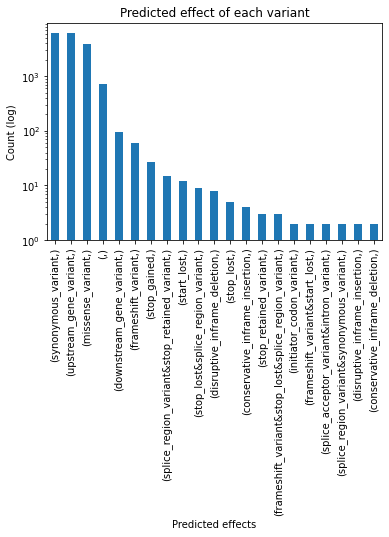

In [63]:
f = open('predict.vcf', 'r')
counter = 0
effects = []

for line in f:
    if '#' in line:
        continue
    fields = line.split('|')
    if fields[1] != '.':
        effects.append(fields[1])
    counter += 1

f.close()

df  = pd.DataFrame(effects) #create Dataframe so it was easier to graph
dsor = df.value_counts()

dsor.plot(kind='bar', log=True)
plt.title('Predicted effect of each variant')
plt.xlabel('Predicted effects')
plt.ylabel('Count (log)')

### All four plots in one figure

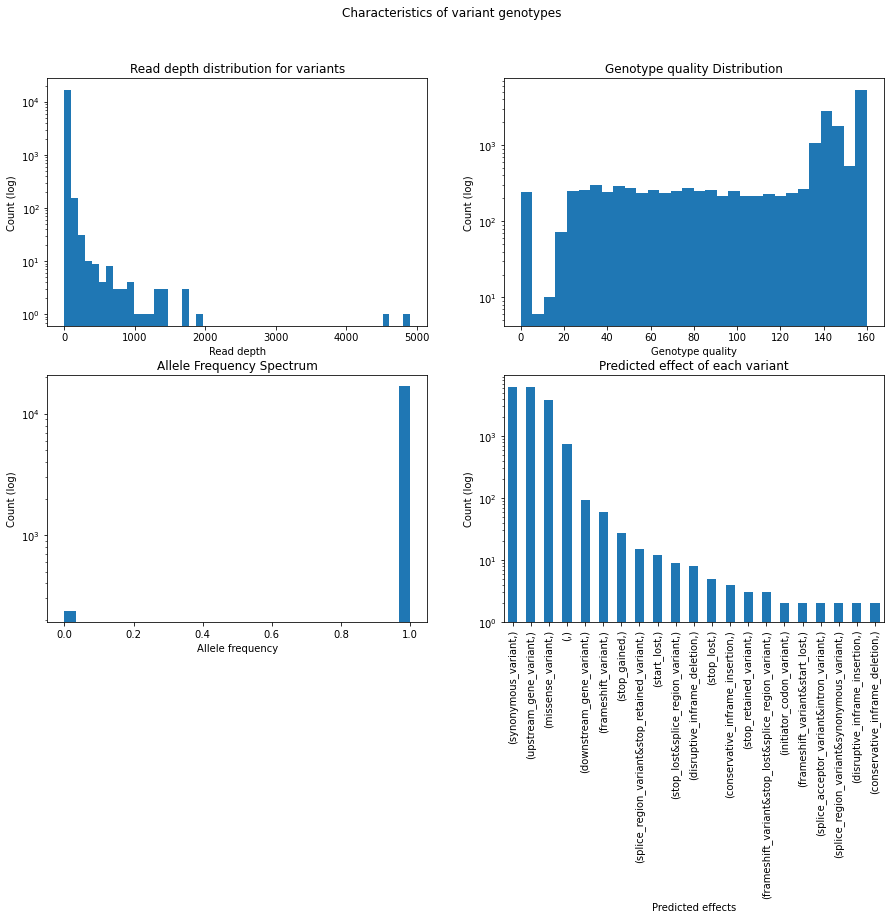

In [86]:
fig, ((ax[0], ax[1]), (ax[2], dsorplt)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Characteristics of variant genotypes")

#read depth
ax[0].hist(depth, bins=50, log=True) 
ax[0].set_title('Read depth distribution for variants')
ax[0].set_xlabel('Read depth')
ax[0].set_ylabel('Count (log)',)
 
#genotype auality
ax[1].hist(quality, bins=30, log=True)
ax[1].set_title('Genotype quality Distribution')
ax[1].set_xlabel('Genotype quality')
ax[1].set_ylabel('Count (log)',)

#allele frequency
ax[2].hist(allele_freq, bins=30, log=True)
ax[2].set_title('Allele Frequency Spectrum')
ax[2].set_xlabel('Allele frequency')
ax[2].set_ylabel('Count (log)',)

#Predicted effects
dsor.plot(kind='bar', log=True)
plt.title('Predicted effect of each variant')
plt.xlabel('Predicted effects')
plt.ylabel('Count (log)')

plt.show()